# Introduction
Titanic was a British passenger liner that sank in 1912 after colliding with an iceberg. Only 31% of passengers survived in this disaster.

### Goal:
The goal of this project is to complete the analysis of what sorts of people were likely to survive.

### Data
Two cvs files downloaded from Kaggle http://www.kaggle.com/c/titanic-gettingStarted/data:
* train.csv (data for a subset of the passengers including outcomes (survived or perished))
* test.csv (data for a subset of passengers without outcomes)

### Data description:
1. Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
2. Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. Name - Name
4. Sex - Sex
5. Age - Age
6. Sibsp - Number of Siblings/Spouses Aboard
7. Parch - Number of Parents/Children Aboard
8. Ticket - Ticket Number
9. Fare - Passenger Fare
10. Cabin - Cabin
11. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Import Data & Python Packages

In [1]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.simplefilter(action='ignore')

# Getting the Data

In [2]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("test.csv")

# Data Preprocessing

In [3]:
# preview train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


In [5]:
# preview test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 418.


* Note: there is no target variable into test data (i.e. "Survival" column is missing), so the goal is to predict this target using different machine learning algorithms such as logistic regression.
* From the table above, We can note that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them.
* We can also spot some more features, that contain missing values (NaN = not a number), that we need to deal with.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training-set has:
* 891 examples
* 11 features + the target variable (survived).
* 2 of the features are floats, 5 are integers and 5 are objects

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that:
* 38% out of the training-set survived the Titanic.
* We can also see that the passenger ages range from 0.4 to 80.
* On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

## Data Quality & Missing Value Assessment

In [9]:
# check missing values in train data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = (train_df.isnull().sum()/train_df.isnull().count())*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(3)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


### Age - Missing Values

~ 20% of entries for passenger age are missing. Let's see what the 'Age' variable looks like in general.

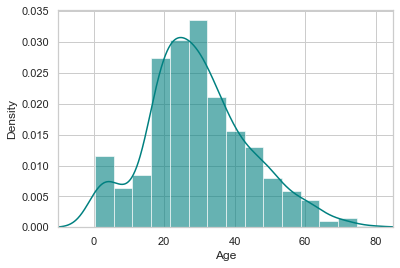

In [11]:
ax = train_df["Age"].hist(bins=15, density=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

* The distribution is skewed to the right, then the mean is often greater than the median.
* Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired.
* To deal with this, we'll use the median to impute the missing values. 

In [12]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean()))

# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median()))

The mean of "Age" is 29.70
The median of "Age" is 28.00


### Cabin - Missing Values

* 77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise.
* We'll ignore this variable in our model.

### Embarked - Missing Values

* There are only 2 (0.22%) missing values for "Embarked".
* We can just impute with the port where most people boarded.

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


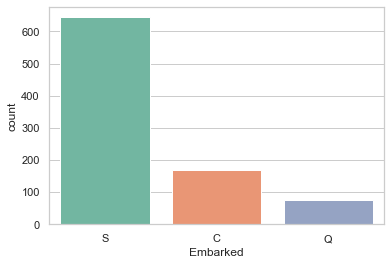

In [13]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

In [14]:
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


By far the most passengers boarded in Southhampton, so we'll impute those 2 NaN's with "S".

## Final Adjustments to Data (Train & Test)

Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:
* If "Age" is missing for a given row, I'll impute with 28 (median age).
* If "Embarked" is missing for a riven row, I'll impute with "S" (the most common boarding port).
* I'll ignore "Cabin" as a variable. There are too many missing values for imputation. Based on the information available, it appears that this value is associated with the passenger's class and fare paid.

In [15]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [16]:
# check missing values in adjusted train data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
# preview adjusted train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


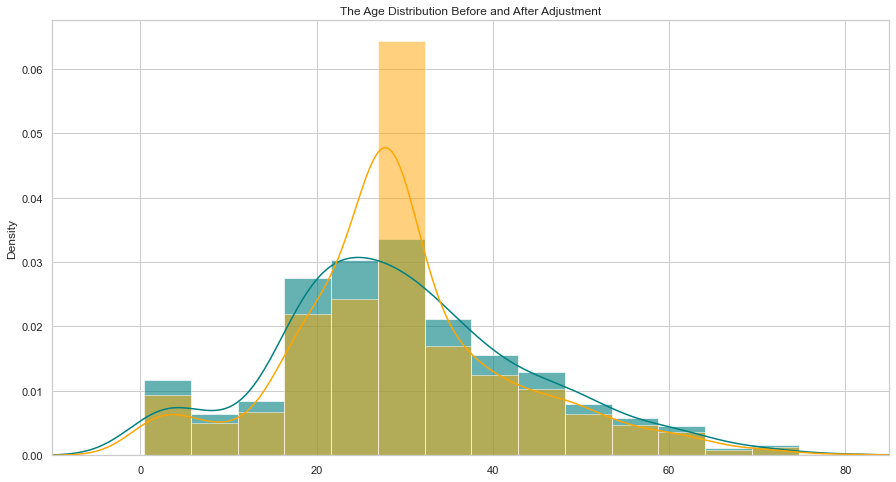

In [18]:
plt.figure(figsize=(15,8))
train_df["Age"].hist(bins=15, density=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
train_data["Age"].hist(bins=15, density=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.title('The Age Distribution Before and After Adjustment')
plt.show()

## Additional Variables

According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family.  For simplicity's sake (and to account for possible multicollinearity), I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [19]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

I'll also create categorical variables for Passenger Class ("Pclass"), Gender ("Sex"), and Port Embarked ("Embarked"). 

In [20]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('Embarked_S', axis=1, inplace=True)
training.drop('Pclass_3', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_Q,Sex_male
0,0,22.0,7.2500,0,False,False,False,False,True
1,1,38.0,71.2833,0,True,False,True,False,False
2,1,26.0,7.9250,1,False,False,False,False,False
3,1,35.0,53.1000,0,True,False,False,False,False
4,0,35.0,8.0500,1,False,False,False,False,True


## Now, apply the same changes to the test data. <br>
I will apply to same imputation for "Age" in the Test data as I did for my Training data (if missing, Age = 28).  <br> I'll also remove the "Cabin" variable from the test data, as I've decided not to include it in my analysis. <br> There were no missing values in the "Embarked" port variable. <br> I'll add the dummy variables to finalize the test set.  <br> Finally, I'll impute the 1 missing value for "Fare" with the median, 14.45.

In [21]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('Embarked_S', axis=1, inplace=True)
testing.drop('Pclass_3', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_Q,Sex_male
0,34.5,7.8292,1,False,False,False,True,True
1,47.0,7.0000,0,False,False,False,False,False
2,62.0,9.6875,1,False,True,False,True,True
3,27.0,8.6625,1,False,False,False,False,True
4,22.0,12.2875,0,False,False,False,False,False


# Exploratory Data Analysis

## Exploration of Age

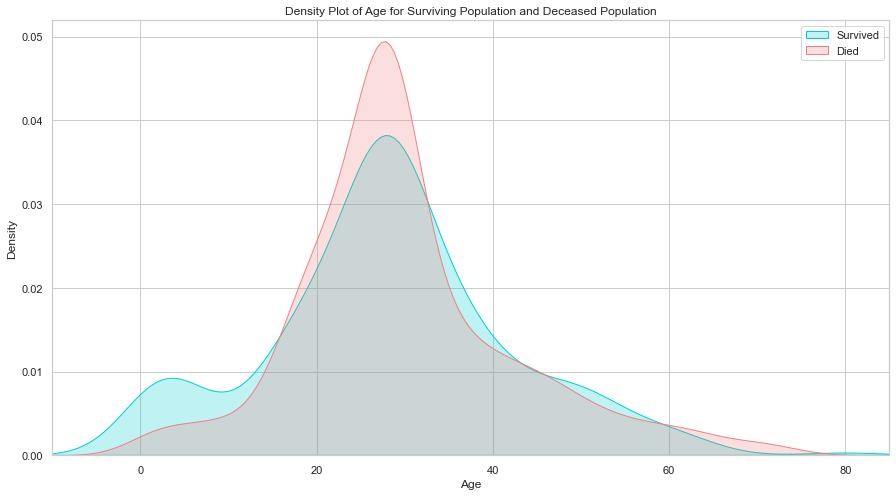

In [23]:
plt.figure(figsize=(15,8))
sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

* The age distribution for survivors and deceased is actually very similar.
* One notable difference is that, of the survivors, a larger proportion were children.
* The passengers evidently made an attempt to save children by giving them a place on the life rafts. 

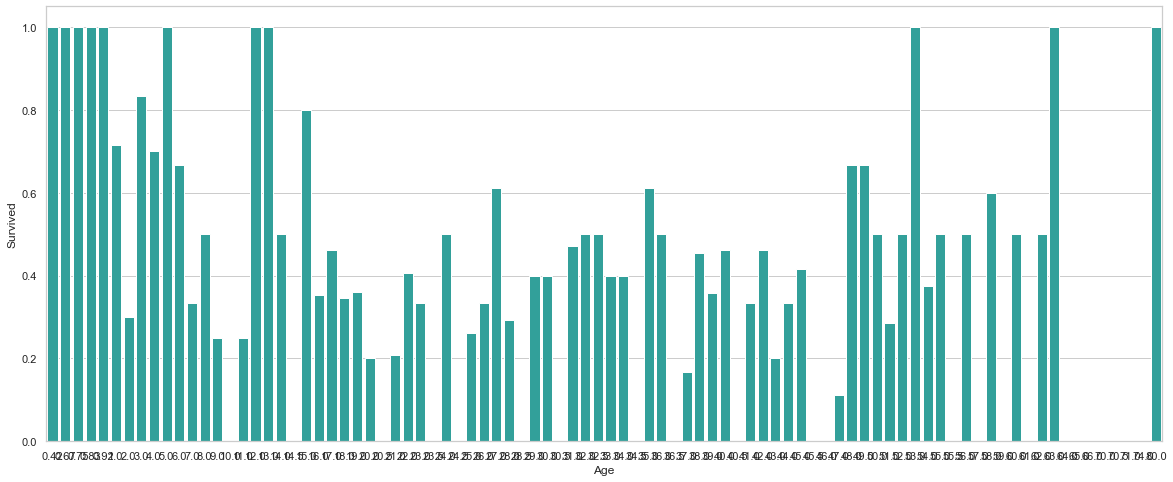

In [24]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

* Considering the survival rate of passengers under 16
* I'll also include another categorical variable in my dataset: "Minor"

In [25]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

## Exploration of Fare

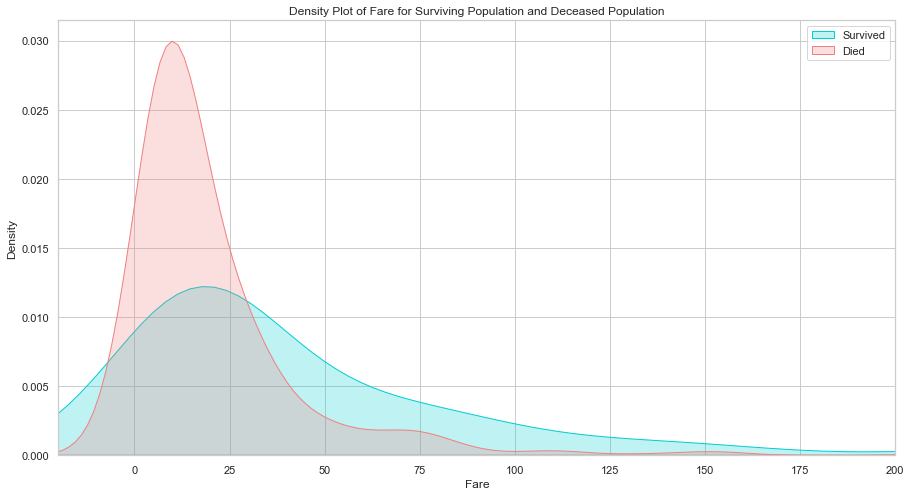

In [26]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

* As the distributions are clearly different for the fares of survivors vs. deceased.
* It's likely that this would be a significant predictor in our final model.
* Passengers who paid lower fare appear to have been less likely to survive.
* This is probably strongly correlated with Passenger Class, which we'll look at next.

## Exploration of Passenger Class

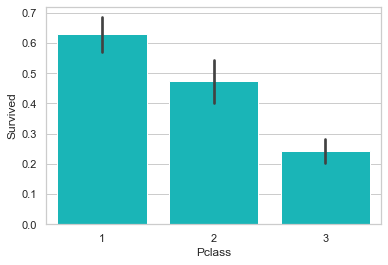

In [27]:
sns.barplot(x='Pclass', y='Survived', data=train_df, color="darkturquoise")
plt.show()

* Unsurprisingly, being a first class passenger was safest.

## Exploration of Embarked Port

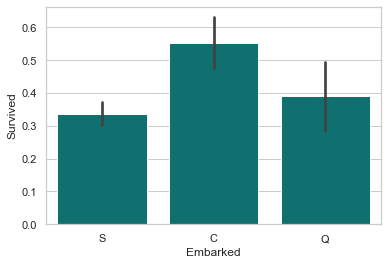

In [28]:
sns.barplot(x='Embarked', y='Survived', data=train_df, color="teal")
plt.show()

* Passengers who boarded in Cherbourg, France, appear to have the highest survival rate.
* Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown.
* This is probably related to passenger class
* Maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck).
* It's also worth noting the size of the whiskers in these plots.
* Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest.
* The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker.
* It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.

## Exploration of Traveling Alone vs. With Family

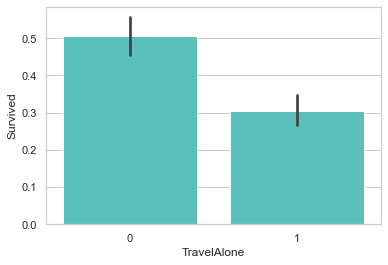

In [29]:
sns.barplot(x='TravelAlone', y='Survived', data=final_train, color="mediumturquoise")
plt.show()

* Individuals traveling without family were more likely to die in the disaster than those with family aboard
* It's likely that individuals traveling alone were likely male.

## Exploration of Gender Variable

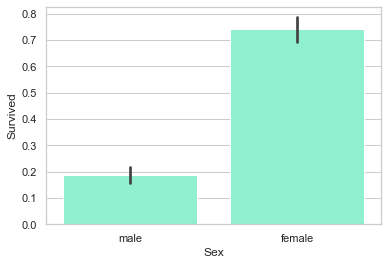

In [30]:
sns.barplot(x='Sex', y='Survived', data=train_df, color="aquamarine")
plt.show()

* This is a very obvious difference.  Clearly being female greatly increased your chances of survival.

# Logistic Regression and Results

## Model training and selection

In [31]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']

# Build a logreg and compute the feature importances
model = LogisticRegression()

# create the RFE model and select 8 attributes
rfe = RFE(model, n_features_to_select=8)
rfe = rfe.fit(X, y)

# create the RFECV model
min_features_to_select=1
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=StratifiedKFold(10),    # cross-validation generator or an iterable
    scoring="accuracy",       # The "accuracy" scoring is proportional to the number of correct classifications
    min_features_to_select=min_features_to_select, 
)
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='accuracy')

In [32]:
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

Optimal number of features: 7
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Sex_male', 'IsMinor']


In [33]:
scores = cross_val_score(LogisticRegression(), X, y, cv=10, scoring='accuracy')
print(" LogisticRegression scores are\n", scores)
print("\n LogisticRegression accuracy is", scores.mean())

 LogisticRegression scores are
 [0.77777778 0.79775281 0.75280899 0.86516854 0.7752809  0.76404494
 0.76404494 0.7752809  0.80898876 0.82022472]

 LogisticRegression accuracy is 0.7901373283395754


* We create the RFE object and compute the cross-validated scores.
* The scoring strategy "accuracy" optimizes the proportion of correctly classified samples.

## Plot number of features VS. cross-validation scores

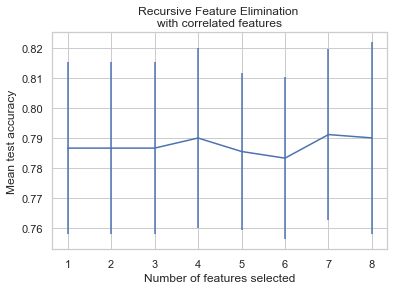

In [34]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"]
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [35]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Sex_male', 'IsMinor']

## Model evaluation based on simple train/test split using `train_test_split()` function

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print("LogisticRegression accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print("LogisticRegression log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print("LogisticRegression auc is %2.3f" % auc(fpr, tpr))



Train/Test split results:
LogisticRegression accuracy is 0.793
LogisticRegression log_loss is 0.427
LogisticRegression auc is 0.867


 ## Model evaluation based on K-fold cross-validation using `cross_val_score()` function

In [37]:
# 10-fold cross-validation logistic regression
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print("LogisticRegression average accuracy is %2.3f" % scores_accuracy.mean())
print("LogisticRegression average log_loss is %2.3f" % -scores_log_loss.mean())
print("LogisticRegression average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.791
LogisticRegression average log_loss is 0.455
LogisticRegression average auc is 0.848


## GridSearchCV evaluating using multiple scorers simultaneously

In [38]:
from sklearn.model_selection import GridSearchCV

X = final_train[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)


best params: LogisticRegression(C=1.9000100000000002)
best params: {'C': 1.9000100000000002}
best score: 0.7979775280898875


Cross validation is an evaluation method used in machine learning to find out how well your machine learning model can predict the outcome of unseen data.

In [39]:
final_test['Survived'] = logreg.predict(final_test[Selected_features])
final_test['PassengerId'] = test_df['PassengerId']

submission = final_test[['PassengerId','Survived']]

submission.to_csv("submission.csv", index=False)

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [40]:
# read in the files that I am going to use:
gender   = pd.read_csv('gender_submission.csv')  
perfect  = pd.read_csv('submission.csv')

## Confusion Matrix Evaluation

In [41]:
cm = confusion_matrix(gender['Survived'],perfect['Survived'])
print(cm)

[[257   9]
 [  6 146]]


In [42]:
gender['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [43]:
perfect['Survived'].value_counts()

Survived
0    263
1    155
Name: count, dtype: int64

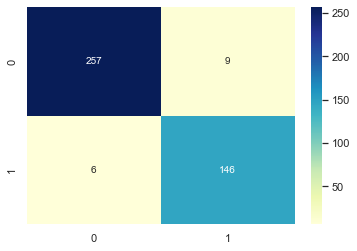

In [44]:
# visualize confusion matrix with seaborn heatmap

titanic_cm = pd.DataFrame(data=cm)

sns.heatmap(titanic_cm, annot=True, fmt='d', cmap='YlGnBu')
sns.set()

In [45]:
from sklearn.metrics import classification_report

print(classification_report(gender['Survived'], perfect['Survived']))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       266
           1       0.94      0.96      0.95       152

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("accuracy_score:", accuracy_score( perfect['Survived'] , gender['Survived']))
print("Precision:", precision_score(gender['Survived'],perfect['Survived']))
print("Recall:",recall_score(gender['Survived'],perfect['Survived']))
print("f1_score:",f1_score(gender['Survived'],perfect['Survived']))

accuracy_score: 0.9641148325358851
Precision: 0.9419354838709677
Recall: 0.9605263157894737
f1_score: 0.9511400651465798


## ROC AUC Curve
Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

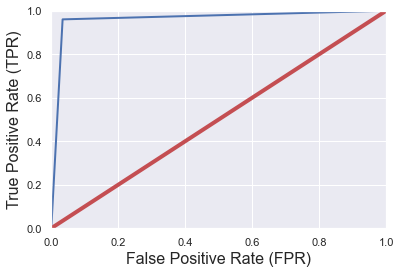

In [47]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(gender['Survived'], perfect['Survived'])
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

## ROC AUC Score
The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [48]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(gender['Survived'], perfect['Survived'])
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9633458646616541


I think that score is good enough to submit the predictions for the test-set to the Kaggle leaderboard.

## Logistic Regression

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

79.49

## Gaussian Naive Bayes:

In [50]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

76.97

## Decision Tree

In [51]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

90.87

## Linear Support Vector Machine:

In [52]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

80.76

## K Nearest Neighbor:

In [53]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

85.39

## Random Forest:

In [54]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

90.17

## Stochastic Gradient Descent (SGD):

In [55]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

74.86

In [56]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
90.87,Decision Tree
90.17,Random Forest
85.39,KNN
80.76,Support Vector Machines
79.49,Logistic Regression
76.97,Naive Bayes
74.86,Stochastic Gradient Decent


* Decision Tree is the best model